In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Genrators (Image dataset from directory)
## from keras thats work for all the data convert into batches(devide the data)and send into RAM one by one. 
### ~ and that use for large amount of data
### ~ Here we create two genrators one for "validation data" and one for "training data".

In [78]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\DELL\MLPROJECT\imagesCatDog\train',
     labels="inferred",
    label_mode="int",
    batch_size=32,
     image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\DELL\MLPROJECT\imagesCatDog\test',
     labels="inferred",
    label_mode="int",
    batch_size=32,
     image_size=(256, 256)
)

Found 1000 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


# Normalize:
### ~ All image store in "Numpy Array" Format 
### ~ Numpy Array bydefault contain value between "0 to 255" but we can set value as "0 to 1" and that metrgod call as  "Normalize"

In [80]:
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label  
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#  Lets create CNN model
## There are Three Architecture 
### ~ 1."32 Filters"
### ~ 2."64 Filters"
### ~ 3."128 Filters"

In [82]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

# Here we add 3 pooling Connector:

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

### ~ lets compile the model 

In [87]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### ~ Execute the model.

In [90]:
history = model.fit(train_ds,epochs=10, validation_data = validation_ds)
# This is call 'Training' the Data.

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.5452 - loss: 5.4159 - val_accuracy: 0.5400 - val_loss: 0.9705
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.5723 - loss: 4.8396 - val_accuracy: 0.5000 - val_loss: 5.7127
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.6128 - loss: 3.2082 - val_accuracy: 0.5800 - val_loss: 1.6960
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.6602 - loss: 2.0161 - val_accuracy: 0.5075 - val_loss: 1.7595
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.6742 - loss: 1.4314 - val_accuracy: 0.5000 - val_loss: 6.1347
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.6636 - loss: 1.1971 - val_accuracy: 0.5275 - val_loss: 1.4790
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.7674 - loss: 0.9534 - val_accuracy: 0.5300 - val_loss: 1.5953
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.7796 - loss: 0.7976 - val_accuracy: 0.5425 - v

In [91]:
history.history

{'accuracy': [0.5419999957084656,
  0.5860000252723694,
  0.6200000047683716,
  0.6639999747276306,
  0.6660000085830688,
  0.6909999847412109,
  0.765999972820282,
  0.7900000214576721,
  0.8149999976158142,
  0.8690000176429749],
 'loss': [5.545602798461914,
  4.173048973083496,
  3.033144950866699,
  1.8506231307983398,
  1.490360975265503,
  1.1204419136047363,
  0.8904159665107727,
  0.7522037029266357,
  0.6055821180343628,
  0.46602097153663635],
 'val_accuracy': [0.5400000214576721,
  0.5,
  0.5799999833106995,
  0.5074999928474426,
  0.5,
  0.5274999737739563,
  0.5299999713897705,
  0.5425000190734863,
  0.5224999785423279,
  0.5350000262260437],
 'val_loss': [0.9705039262771606,
  5.712746620178223,
  1.6959624290466309,
  1.759488821029663,
  6.134658336639404,
  1.479015827178955,
  1.595258355140686,
  1.593798041343689,
  2.87327241897583,
  1.9624981880187988]}

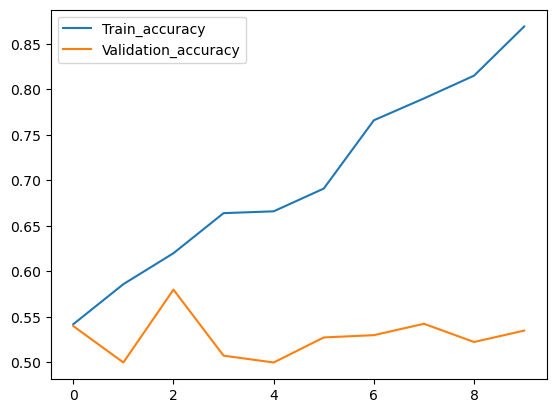

In [99]:
data=history.history
plt.plot(data['accuracy'],label='Train_accuracy')
plt.plot(data['val_accuracy'],label='Validation_accuracy')
plt.legend()
plt.show()

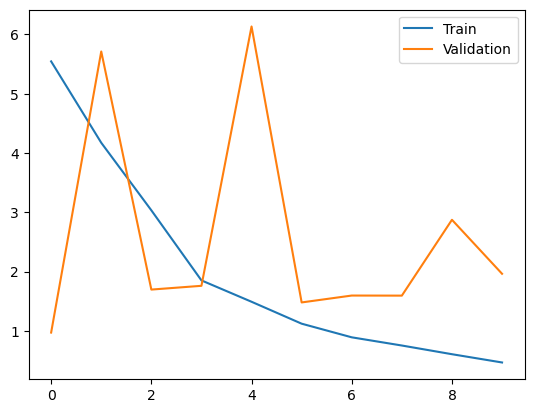

In [101]:
data=history.history
plt.plot(data['loss'],label='Train')
plt.plot(data['val_loss'],label='Validation')
plt.legend()
plt.show()

In [109]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 193.2 kB/s eta 0:03:21
   ---------------------------------------- 0.1/38.8 MB 193.2 kB/s eta 0:03:21
  

In [111]:
import cv2

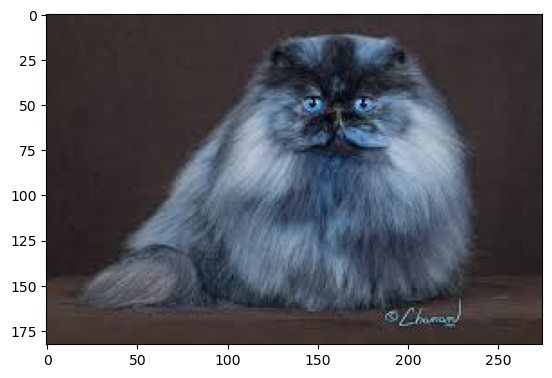

In [139]:
test_img = cv2.imread(r'C:\Users\DELL\MLPROJECT\cat.jfif')
plt.imshow(test_img)

In [141]:
test_img.shape

(183, 275, 3)

In [143]:
test_img = cv2.resize(test_img,(256,256))

In [145]:
test_input=test_img.reshape((1,256,256,3))

In [147]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.]], dtype=float32)